In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cities = pd.read_csv("Data/500_Cities__Local_Data_for_Better_Health__2019_release_20240314.zip")
SVI = pd.read_csv("Data/SVI_2016_Census_Tracts.csv")
hpsa_pc_full = pd.read_excel("Data/BCD_HPSA_FCT_DET_PC.xlsx") # Health Professional Shortage Area - Primary Care
# city_county = pd.read_excel("Data/uscities.xlsx")[['county_name', 'state_id', 'city']]


A census tract FIPS code is an 11-digit number that uniquely identifies each census tract in the United States. It is a concatentation of - reading from left to right - the 2-digit state code, the 3-digit county code, and the 6-digit tract code

- cities: FIPS(11)
- SVI: FIPS(11)
- hpsa: FIPS(11) , (10), (5)

28004 26724


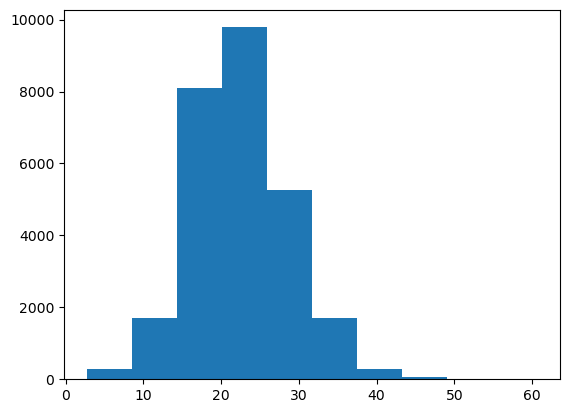

In [65]:
# Clean 500 cities data
ct_500_cities = cities[cities['GeographicLevel'] == 'Census Tract']

Health_Outcomes = ct_500_cities.loc[cities['Category'] == "Health Outcomes"]
heart_disease_outcome = Health_Outcomes.loc[Health_Outcomes['Measure'] == 'Arthritis among adults aged >=18 Years']

heart_disease_outcome_10 = heart_disease_outcome.loc[heart_disease_outcome['High_Confidence_Limit'] > 10]   #parameter
plt.hist(heart_disease_outcome['High_Confidence_Limit'])
print(len(heart_disease_outcome), len(heart_disease_outcome_10))
heart_disease_outcome_10 = heart_disease_outcome_10[['TractFIPS', 'Data_Value']]
heart_disease_outcome_10['TractFIPS'] = heart_disease_outcome_10['TractFIPS'].astype(int).astype(str)
heart_disease_outcome_10['TractFIPS'] = heart_disease_outcome_10['TractFIPS'].apply(lambda x: '0'+x if len(x) <11 else x)
heart_disease_outcome_10['FIPS'] = heart_disease_outcome_10['TractFIPS'].apply(lambda x: x[:5] )

In [66]:
heart_disease_outcome_10.head(3) 

,TractFIPS,Data_Value,FIPS
0,06037602504,14.6,06037
5,06065045213,22.0,06065
57,06037543601,15.7,06037


In [7]:
# clean_SVI = SVI.dropna(axis=1, how='all') # drop all na columns
# clean_SVI = clean_SVI.loc[:, (clean_SVI != 0).any(axis=0)] # drop all 0 columns
clean_SVI = SVI.drop(columns=['ST',	'STATE', 'ST_ABBR',	'STCNTY', 'COUNTY', 'LOCATION'])
clean_SVI['FIPS'] = clean_SVI['FIPS'].astype(str).apply(lambda x: '0'+x if len(x) == 10 else x)

In [8]:
clean_SVI.head(3)

,FIPS,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,...,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,01015981902,34.644448,0,11,0,11,0,11,0,11,...,-999,-999,-999,-999,-999,0,11,-999.0,-999.0,335
1,01097990000,0.000000,0,11,0,11,0,11,0,11,...,-999,-999,-999,-999,-999,0,11,-999.0,-999.0,0
2,01117980000,13.634818,0,11,0,11,0,11,0,11,...,-999,-999,-999,-999,-999,0,11,-999.0,-999.0,140


In [13]:
hpsa_pc_condensed = hpsa_pc_full[hpsa_pc_full['HPSA Geography Identification Number'] != 'POINT'] # Not specific locations (eg correctional facilities)
hpsa_pc_condensed = hpsa_pc_condensed[hpsa_pc_condensed['HPSA Status'] != 'Withdrawn'] 
hpsa_pc_condensed = hpsa_pc_condensed.sort_values(by='HPSA Designation Date')
hpsa_pc_condensed = hpsa_pc_condensed.drop_duplicates(subset='HPSA Geography Identification Number', keep='first') # 146 duplicated data 
# hpsa_pc_condensed = hpsa_pc_condensed[hpsa_pc_condensed['Designation Type'] == 'Geographic HPSA'] # Only when everybody in a specifc area has a shortage

hpsa_pc_condensed = hpsa_pc_condensed.drop(columns=['Common State FIPS Code', 'Primary State FIPS Code', 'State FIPS Code'])
hpsa_pc_condensed = hpsa_pc_condensed[[
 'HPSA Geography Identification Number',
 'Common State County FIPS Code',
 'HPSA Component Type Code',
 'HPSA Score',
 'HPSA FTE',
 'HPSA Designation Population',
 '% of Population Below 100% Poverty',
 'HPSA Formal Ratio',
 'Rural Status',
 'HPSA Estimated Served Population',
 'HPSA Estimated Underserved Population',
 'HPSA Shortage',
 'HPSA Status Code',
 'Rural Status Code',
 'U.S. - Mexico Border 100 Kilometer Indicator',
 'U.S. - Mexico Border County Indicator',
]]

hpsa_pc_condensed_ct = hpsa_pc_condensed[hpsa_pc_condensed['HPSA Component Type Code'] == 'CT'] #(11)
hpsa_pc_condensed_scty = hpsa_pc_condensed[hpsa_pc_condensed['HPSA Component Type Code'] == 'SCTY']  #(5)
hpsa_pc_condensed_csd = hpsa_pc_condensed[hpsa_pc_condensed['HPSA Component Type Code'] == 'CSD'] #(10)

In [16]:
hpsa_pc_condensed.head(3)

,HPSA Geography Identification Number,Common State County FIPS Code,HPSA Component Type Code,HPSA Score,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,Rural Status,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Shortage,HPSA Status Code,Rural Status Code,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator
15124,06029003305,06029,CT,17,0.0,7676.0,17.8,NaN,Non-Rural,0.0,7676.0,2.19,D,N,N,N
15123,06029003306,06029,CT,17,0.0,7676.0,17.8,NaN,Rural,0.0,7676.0,2.19,D,R,U,N
12367,48379,48379,SCTY,14,0.0,11669.0,12.9,NaN,Rural,0.0,11669.0,3.33,D,R,N,N


In [46]:
csd_to_ct_2010 = pd.read_csv("Data/CSD_to_CT_2010.csv")
csd_to_ct_2010['tract'] = csd_to_ct_2010['tract'].multiply(100).astype(int).astype(str).apply(lambda x: ('0'* (6-len(x)))+x if len(x) <6 else x)
csd_to_ct_2010['county'] = csd_to_ct_2010['county'].astype(str).apply(lambda x: '0'+x if len(x) < 5 else x)
csd_to_ct_2010['cousubfp'] = csd_to_ct_2010['cousubfp'].astype(str).apply(lambda x: ('0'* (5-len(x)))+x if len(x) <5 else x)

csd_to_ct_2010['csd'] = csd_to_ct_2010['county'] + csd_to_ct_2010['cousubfp']
csd_to_ct_2010['ct'] = csd_to_ct_2010['county'].astype(str) + csd_to_ct_2010['tract']

csd_to_ct_2010 =csd_to_ct_2010[['csd', 'ct']]

In [47]:
csd_to_ct_2010.head(3)

,csd,ct
0,0100190171,01001021100
1,0100190315,01001021000
2,0100192106,01001020900


In [117]:
merge_ct = heart_disease_outcome_10.merge(hpsa_pc_condensed_ct, left_on=['TractFIPS'], right_on=['HPSA Geography Identification Number'] , how='inner')
merge_scty = heart_disease_outcome_10.merge(hpsa_pc_condensed_scty, left_on=['FIPS'], right_on=['HPSA Geography Identification Number'] , how='inner')
merge_csd = heart_disease_outcome_10.merge(csd_to_ct_2010, left_on=['TractFIPS'], right_on=['ct'], how='inner')
merge_csd = merge_csd.merge(hpsa_pc_condensed_csd, left_on=['csd'], right_on=['HPSA Geography Identification Number'], how='inner')
merge = pd.concat([merge_ct, merge_scty, merge_csd], ignore_index=True)
merge_all = merge.merge(clean_SVI, left_on=['TractFIPS'], right_on=['FIPS'], how='inner')
merge_all = merge_all.drop(columns=['TractFIPS', 'FIPS_x', 'HPSA Geography Identification Number', 'Common State County FIPS Code', 'HPSA Component Type Code', 'ct', 'csd', 'FIPS_y'])

In [118]:
merge_all['HPSA Formal Ratio'] = merge_all['HPSA Formal Ratio'].astype(str).apply(lambda x: int(x[:-2]) if x != 'nan' else pd.NA)

In [119]:
merge_all.head(5)

,Data_Value,HPSA Score,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,Rural Status,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Shortage,...,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,14.6,15,1.9563,29849.0,15.9,15258,Non-Rural,5869.0,23980.0,7.9937,...,1,0,0,2,4,975,191,21.6,4.2,1206
1,15.7,13,4.1000,56943.0,11.3,13889,Non-Rural,12300.0,44643.0,14.8800,...,1,0,0,1,3,672,226,16.1,5.6,2189
2,19.0,18,13.4600,61983.0,37.3,4605,Non-Rural,40380.0,21603.0,7.2000,...,0,1,1,3,5,426,207,9.0,4.1,21569
3,28.0,20,9.3400,59721.0,30.2,6394,Non-Rural,28020.0,31701.0,10.5700,...,0,0,0,0,0,609,321,8.2,4.2,5456
4,18.3,18,4.7500,104560.0,27.2,22013,Non-Rural,14250.0,90310.0,30.1000,...,0,0,0,1,3,609,219,18.9,6.2,3836


In [120]:
merge_cor = merge_all.select_dtypes(['float64', 'int64']) 
correlation_metric= merge_cor.corr(method='pearson')

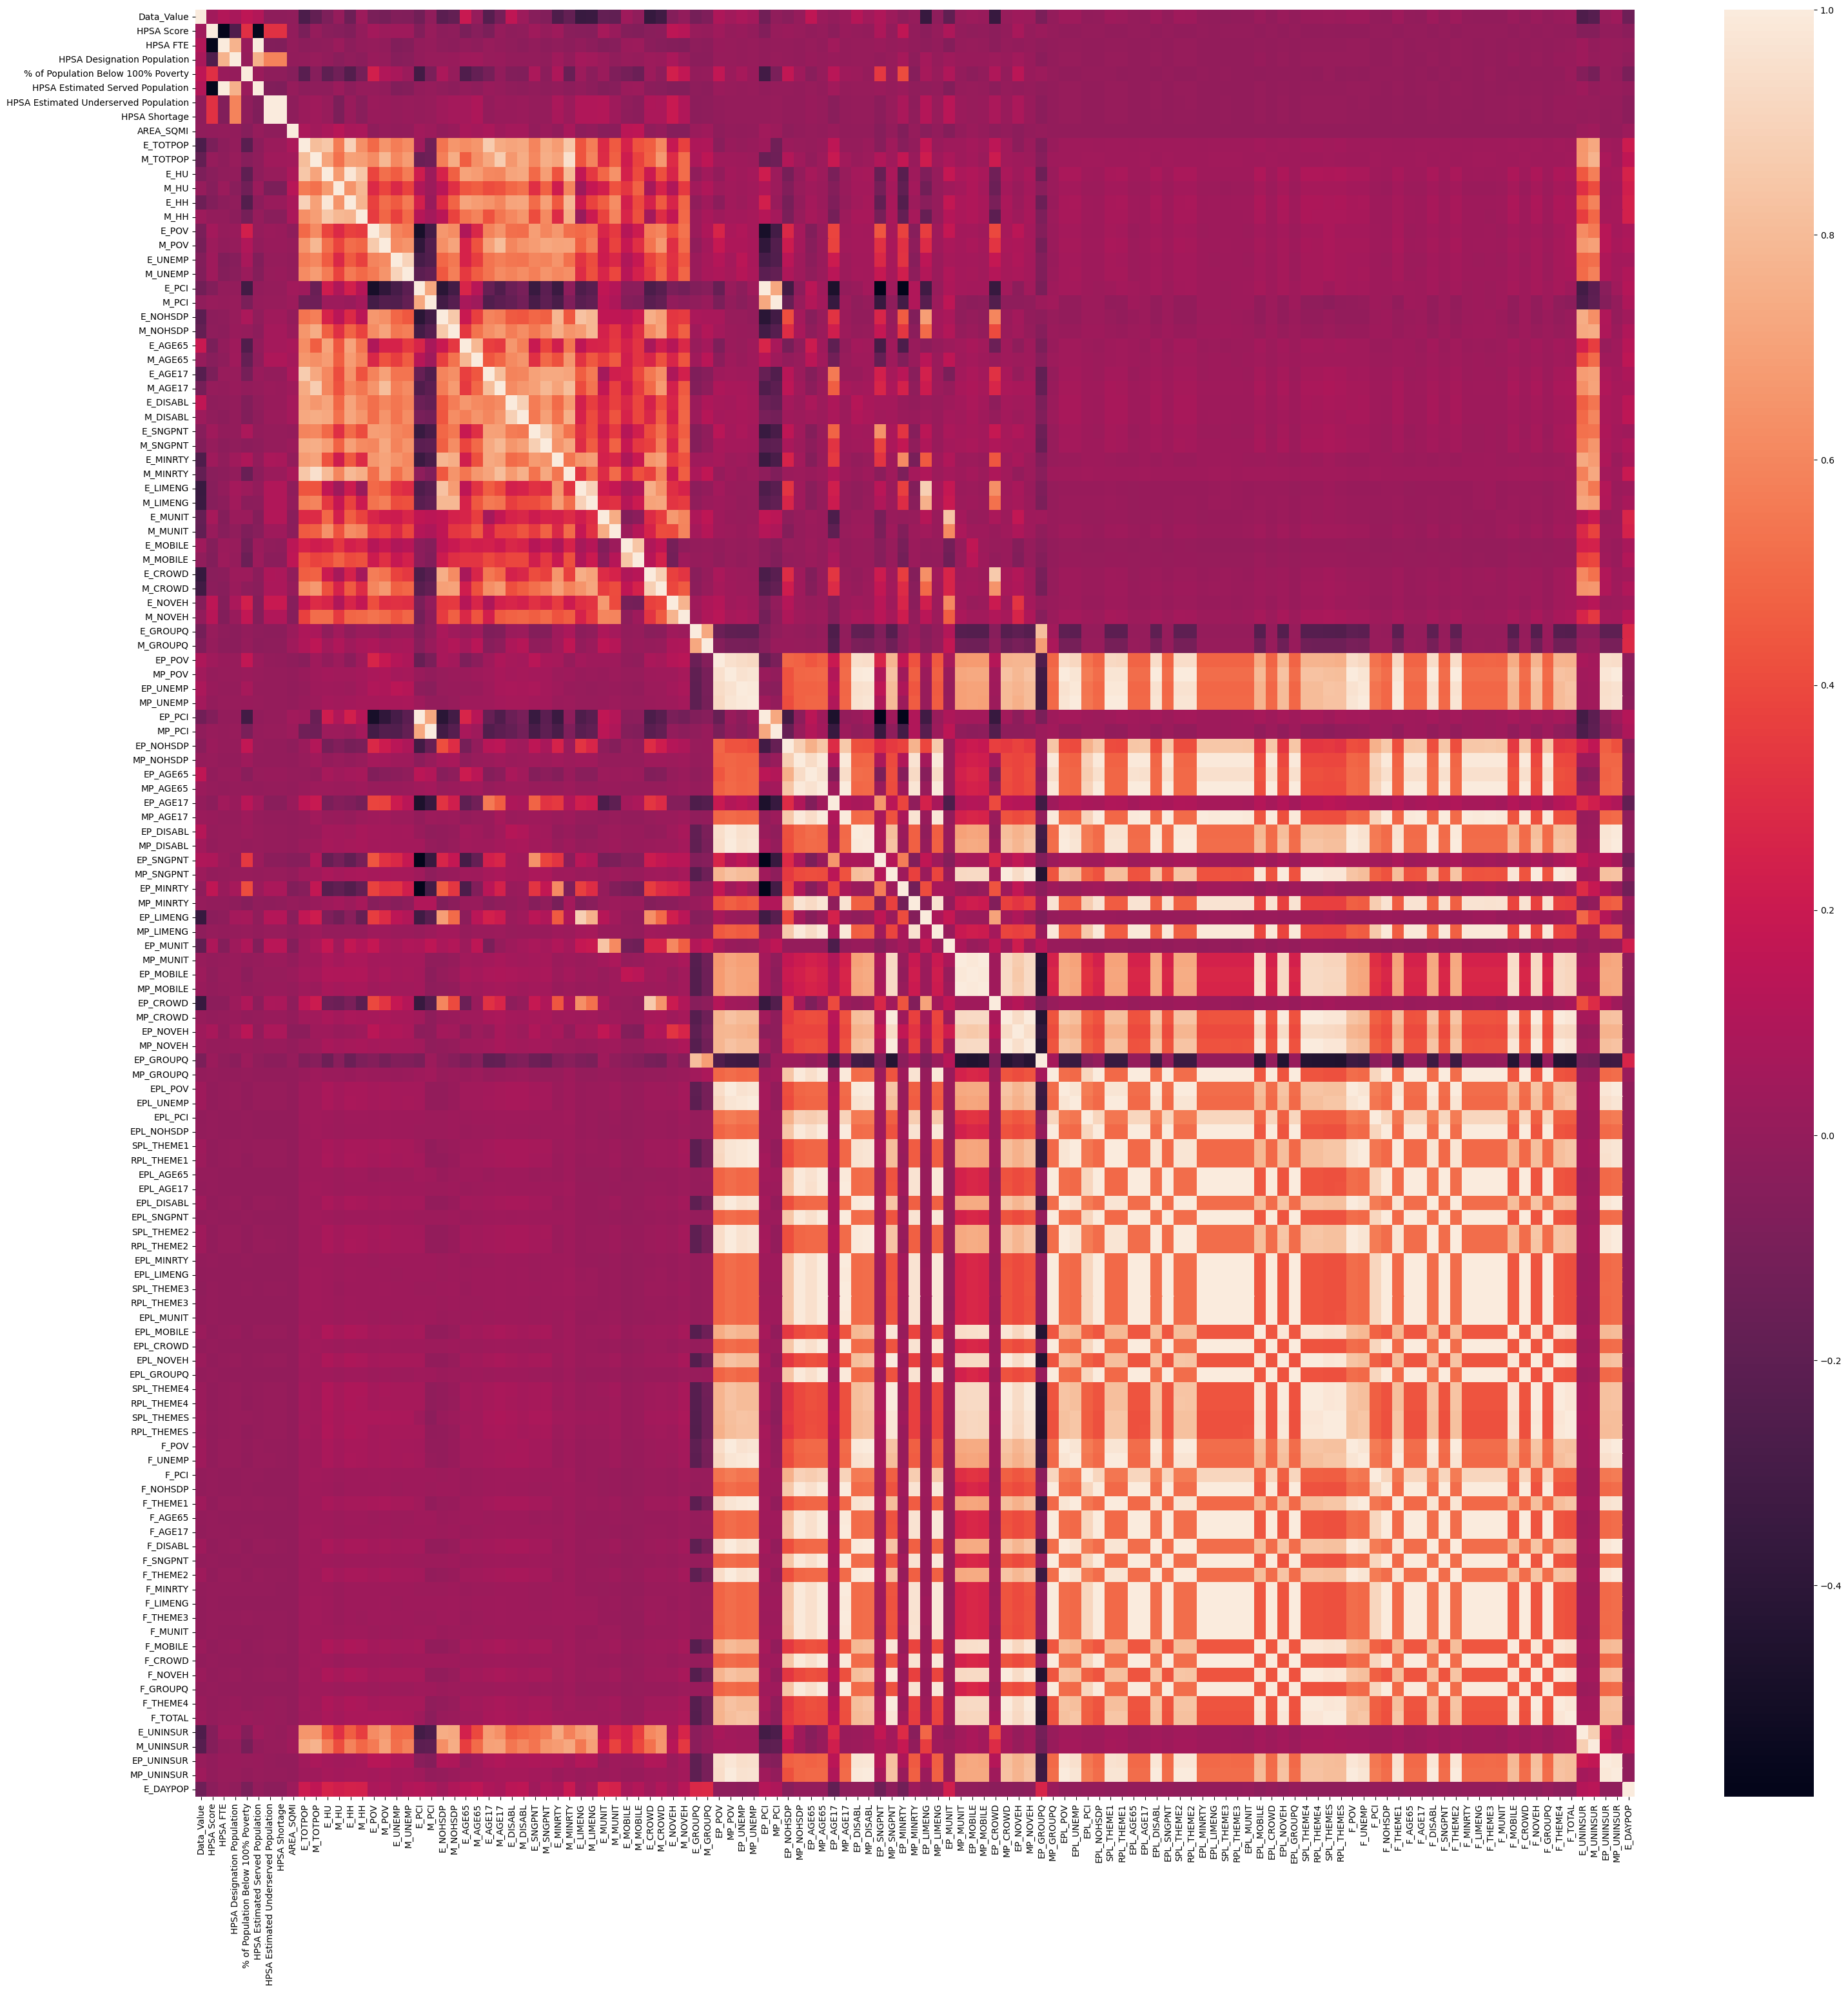

In [121]:
fig = plt.figure(figsize=(36,36))
sns.heatmap(correlation_metric, annot = False, fmt = '.2f')

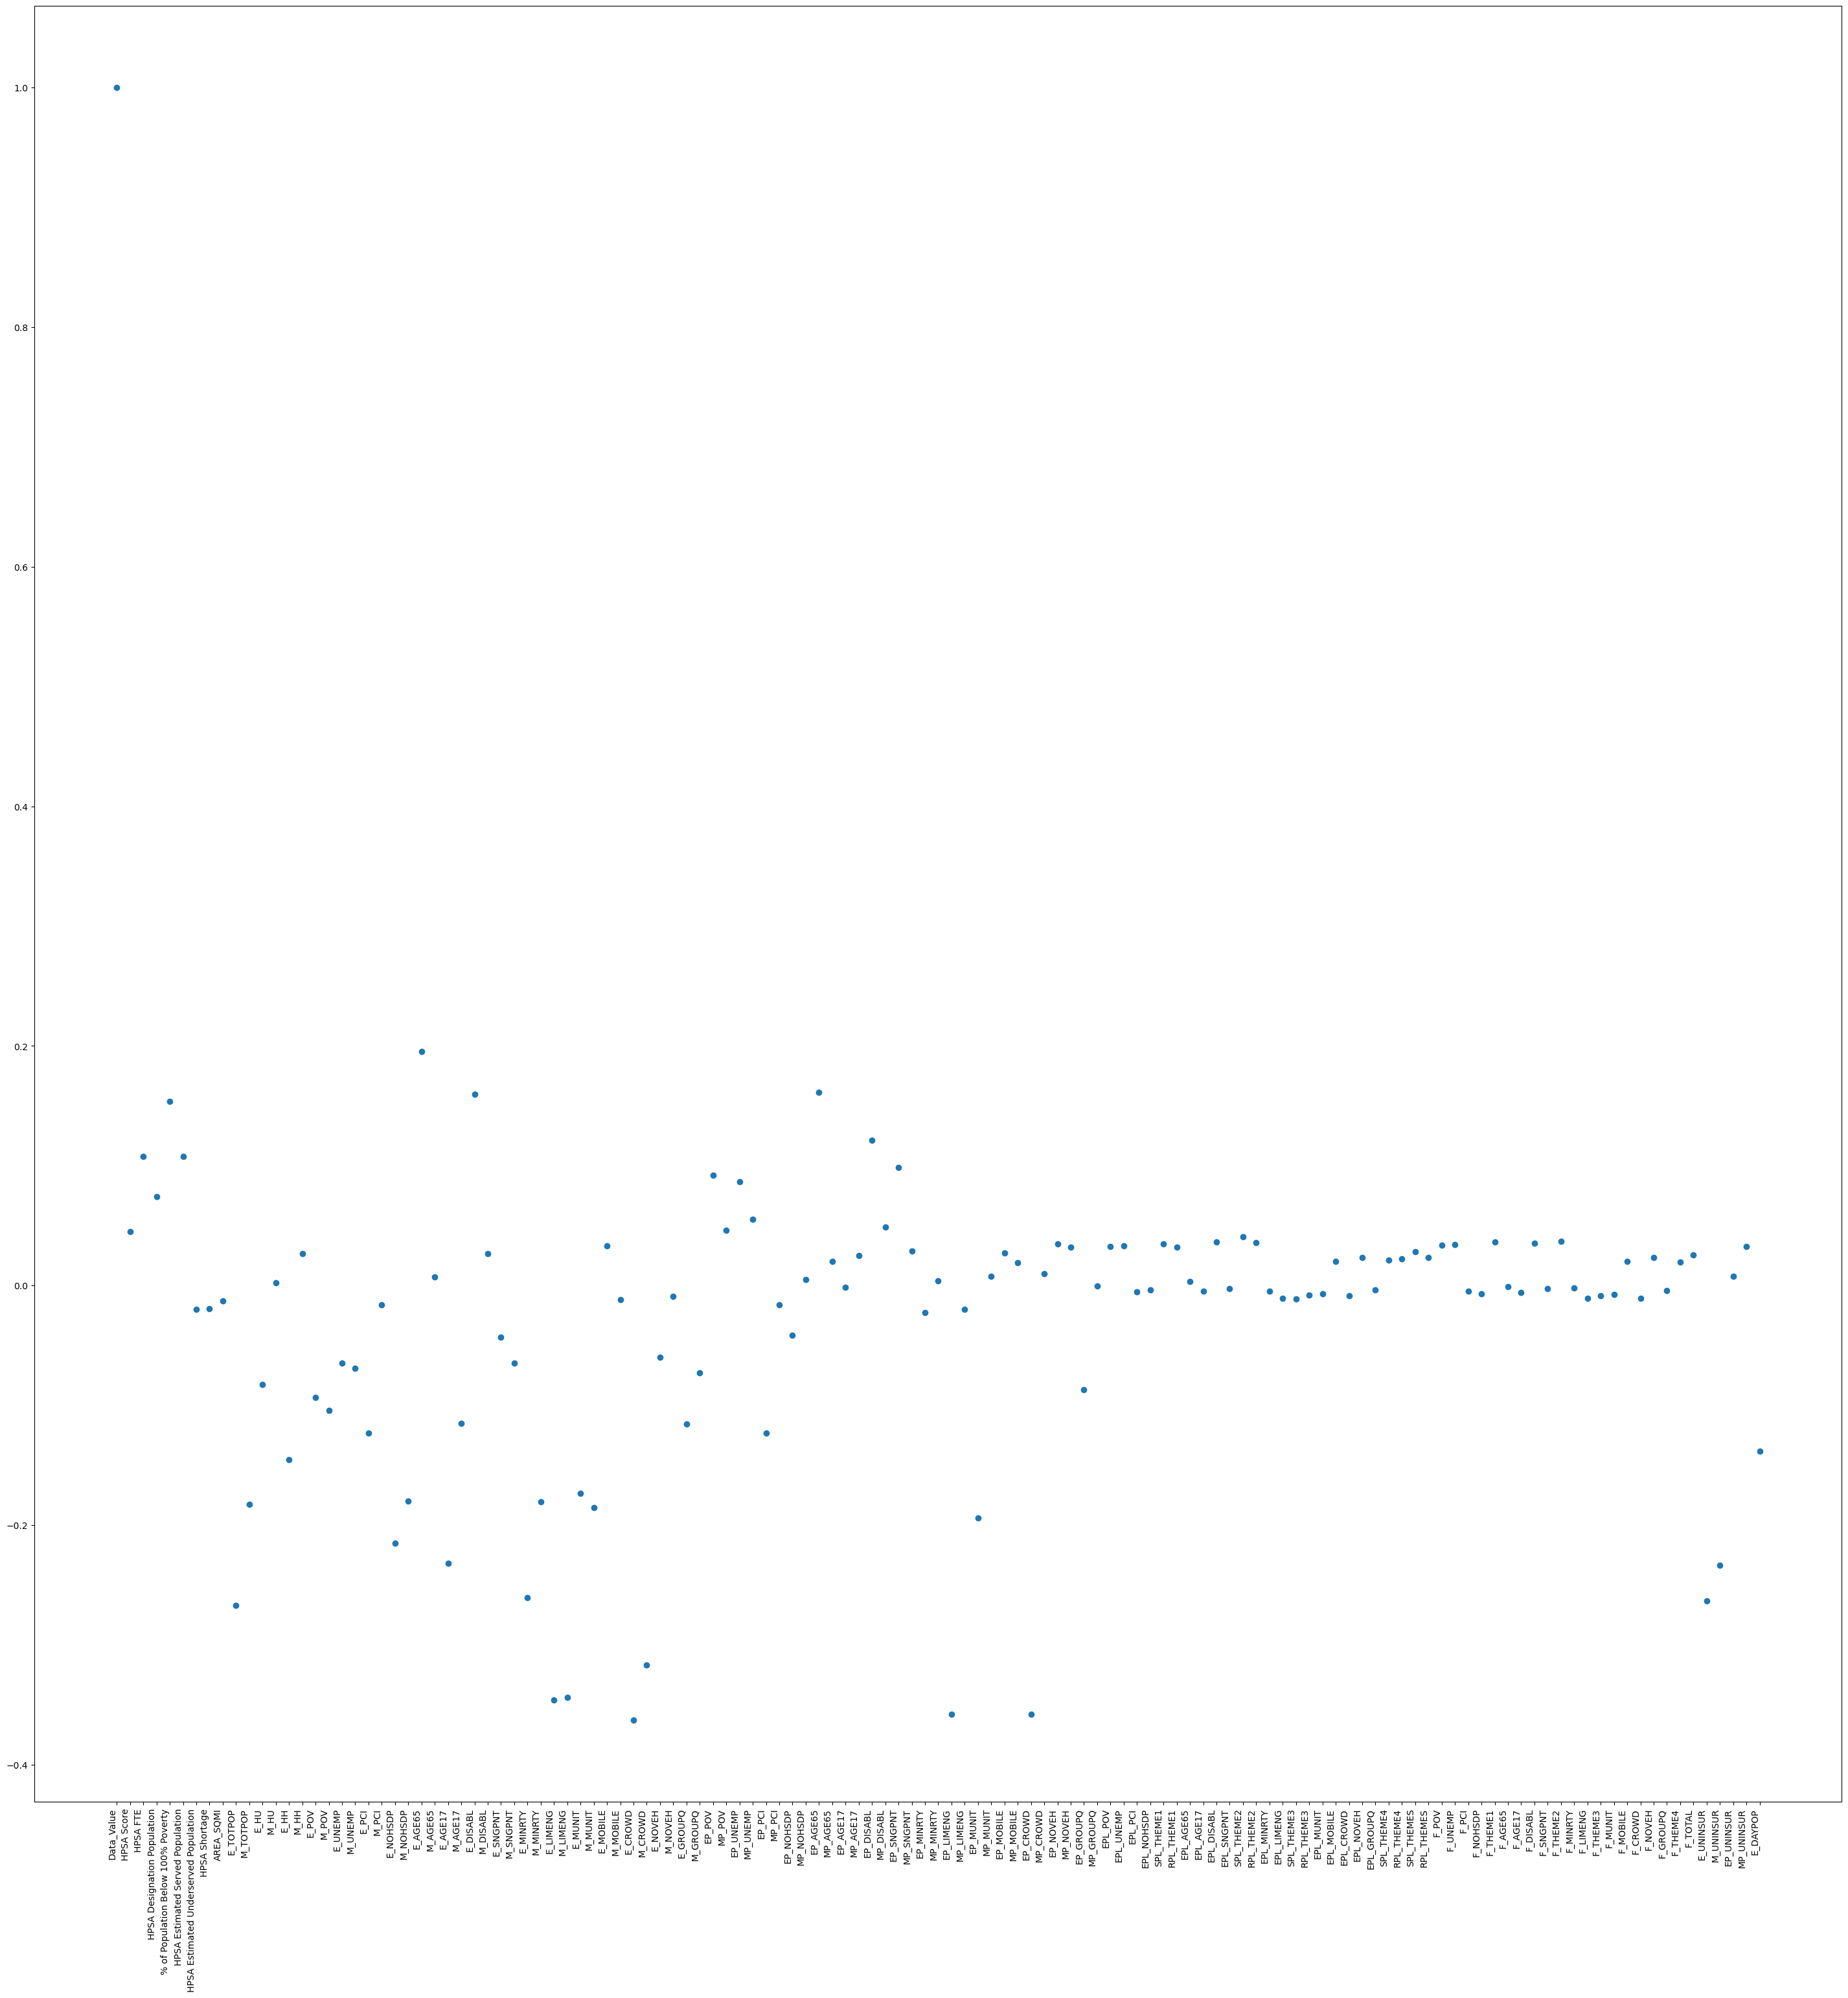

In [122]:
outcome_corr = correlation_metric.iloc[:,0]
fig = plt.figure(figsize=(36,36))
plt.scatter(outcome_corr.index, outcome_corr)
plt.xticks(rotation=90, ha='right')
plt.show()

In [151]:
high_correlated_1 = merge_cor.loc[:, (outcome_corr >= 0.1) |  (outcome_corr <= -0.1)]
high_correlated_1 = high_correlated_1.select_dtypes(include=np.number).dropna()
# list(high_correlated_1.columns)
high_correlated_2 = merge_cor.loc[:, (outcome_corr >= 0.2) |  (outcome_corr <= -0.2)]
high_correlated_2 = high_correlated_2.select_dtypes(include=np.number).dropna()
# list(high_correlated_2.columns)
non_correlated_ = merge_all
non_correlated_ = non_correlated_.select_dtypes(include=np.number).dropna()
print(len(high_correlated_1.columns), len(high_correlated_2.columns), len(non_correlated_.columns))

33 13 125


In [174]:
# print(list(high_correlated_1.columns))
# print(list(high_correlated_2.columns))
a = list(high_correlated_2.columns) 
b = list(high_correlated_1.columns)
print(outcome_corr[a])

Data_Value    1.000000
E_TOTPOP     -0.267135
E_NOHSDP     -0.215166
E_AGE17      -0.231722
E_MINRTY     -0.260422
E_LIMENG     -0.346085
M_LIMENG     -0.343985
E_CROWD      -0.362918
M_CROWD      -0.316959
EP_LIMENG    -0.357775
EP_CROWD     -0.357802
E_UNINSUR    -0.263524
M_UNINSUR    -0.233664
Name: Data_Value, dtype: float64


In [375]:
high_correlated = merge_cor[[ 'EP_NOHSDP', 'EP_MINRTY', 'EP_PCI', 'EP_DISABL', 'EP_POV', 'EP_AGE65', 'EP_UNEMP', 'EP_NOVEH', 'EP_SNGPNT', 'EP_LIMENG',
   'EP_AGE17', 'EP_UNINSUR','EP_CROWD', 'EP_MUNIT', 'AREA_SQMI', 'EP_GROUPQ', 'EP_MOBILE', 'Data_Value']]
high_correlated

,EP_NOHSDP,EP_MINRTY,EP_PCI,EP_DISABL,EP_POV,EP_AGE65,EP_UNEMP,EP_NOVEH,EP_SNGPNT,EP_LIMENG,EP_AGE17,EP_UNINSUR,EP_CROWD,EP_MUNIT,AREA_SQMI,EP_GROUPQ,EP_MOBILE,Data_Value
0,22.3,73.3,29301.0,9.9,17.8,12.2,8.9,9.5,10.0,14.4,22.8,15.9,11.8,26.5,4058.183382,1.7,1.5,14.6
1,22.3,73.3,29301.0,9.9,17.8,12.2,8.9,9.5,10.0,14.4,22.8,15.9,11.8,26.5,4058.183382,1.7,1.5,15.7
2,22.3,73.3,29301.0,9.9,17.8,12.2,8.9,9.5,10.0,14.4,22.8,15.9,11.8,26.5,4058.183382,1.7,1.5,15.0
3,22.3,73.3,29301.0,9.9,17.8,12.2,8.9,9.5,10.0,14.4,22.8,15.9,11.8,26.5,4058.183382,1.7,1.5,14.7
4,22.3,73.3,29301.0,9.9,17.8,12.2,8.9,9.5,10.0,14.4,22.8,15.9,11.8,26.5,4058.183382,1.7,1.5,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26719,6.7,21.0,30249.0,12.6,10.4,14.1,5.6,4.1,9.9,0.8,23.5,10.5,1.2,5.3,2685.913260,2.0,9.9,15.7
26720,6.7,21.0,30249.0,12.6,10.4,14.1,5.6,4.1,9.9,0.8,23.5,10.5,1.2,5.3,2685.913260,2.0,9.9,25.2
26721,6.7,21.0,30249.0,12.6,10.4,14.1,5.6,4.1,9.9,0.8,23.5,10.5,1.2,5.3,2685.913260,2.0,9.9,24.5
26722,6.7,21.0,30249.0,12.6,10.4,14.1,5.6,4.1,9.9,0.8,23.5,10.5,1.2,5.3,2685.913260,2.0,9.9,25.2


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_validate

In [159]:
random_X = merge_cor.drop(columns='Data_Value')
random_X = random_X.sample(32, axis=1)
high_correlated = pd.concat([merge_cor['Data_Value'], random_X], axis=1)
print(len(high_correlated.columns))

33


In [196]:
high_correlated = high_correlated_2

In [197]:
high_correlated = high_correlated.dropna()
high_correlated_X = high_correlated.drop(columns='Data_Value')
scaler = StandardScaler()
X_rf = scaler.fit_transform(high_correlated_X)

measure_desc = high_correlated['Data_Value'].describe()
bin_edges = [measure_desc[3], measure_desc[4], measure_desc[6], measure_desc[7]]
bin_labels = ['low', 'medium', 'high']
y_binned = pd.cut(high_correlated['Data_Value'], bins=bin_edges, labels=bin_labels, include_lowest=True)

m =  X_rf.shape[1]
max_features = [ m, m//2, 'sqrt']
num_trees = [1, 50, 100, 200]
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True)

test_accs = []
feature_importances = []

for features in max_features:
    for tree in num_trees:
        # Instantiate a random forest object. Set max_depth=5.
        rf_clf = RandomForestClassifier(n_estimators=tree, max_features=features, max_depth=10)
        # rf_clf = RandomForestClassifier(n_estimators=tree, max_features=features, max_depth=10)

        # Perform cross validation
        rf_cv = cross_validate(rf_clf, X_rf, y_binned, scoring='accuracy', cv=skf, return_estimator=True)

        # Record the mean of CV test scores

        test_accs.append(np.mean(rf_cv['test_score']))

        importances = np.mean([estimator.feature_importances_ for estimator in rf_cv['estimator']], axis=0)
        feature_importances.append(importances)

feature_names = high_correlated_X


In [198]:
feature_names = high_correlated_X.columns
mean_feature_importances = np.mean(feature_importances, axis=0)
std_feature_importances = np.std(feature_importances, axis=0)
indices = np.argsort(mean_feature_importances)[::-1]
indices

feature_ranking = pd.DataFrame(columns=('feature', 'importance'))

# print("Feature ranking:")
for f in range(len(feature_names)):
    feature_ranking.loc[f] = [feature_names[indices[f]], mean_feature_importances[indices[f]]]
    # feature_ranking.append("%d. feature %d (%f) - %s" % (f + 1, indices[f], mean_feature_importances[indices[f]], feature_names[indices[f]]))
    # print("%d. feature %d (%f) - %s" % (f + 1, indices[f], mean_feature_importances[indices[f]], feature_names[indices[f]]))

# analysis_dict[measure] = (linear_reg.score(X_numeric_scaled,y), linear_reg.coef_, test_accs, feature_ranking)

In [201]:
# saving the dataframe
feature_ranking.to_csv('Results/ARTHRITIS_0.2(12).csv')

In [152]:
X = high_correlated_1.drop(columns='Data_Value')
X = scaler.fit_transform(X)
linear_reg1 = LinearRegression().fit(X, high_correlated_1['Data_Value'])
score1 = linear_reg1.score(X, high_correlated_1['Data_Value'])

X = high_correlated_2.drop(columns='Data_Value')
X = scaler.fit_transform(X)
linear_reg2 = LinearRegression().fit(X, high_correlated_2['Data_Value'])
score2 = linear_reg2.score(X, high_correlated_2['Data_Value'])

X = non_correlated_.drop(columns='Data_Value')
X = scaler.fit_transform(X)
linear_reg3 = LinearRegression().fit(X, non_correlated_['Data_Value'])
score3 = linear_reg3.score(X, non_correlated_['Data_Value'])

print(score1, score2, score3)

0.591105678766985 0.27375943291089644 0.7344368008325455


In [205]:
high_correlated_2.columns

Index(['Data_Value', 'E_TOTPOP', 'E_NOHSDP', 'E_AGE17', 'E_MINRTY', 'E_LIMENG',
       'M_LIMENG', 'E_CROWD', 'M_CROWD', 'EP_LIMENG', 'EP_CROWD', 'E_UNINSUR',
       'M_UNINSUR'],
      dtype='object')

In [203]:
linear_reg2.coef_

array([-3.07488949,  3.14043062,  1.39035967, -0.78731909,  0.40422393,
       -0.6226201 , -0.84638696,  0.70931088, -2.03300087, -1.67249957,
       -0.83953118,  0.58427818])

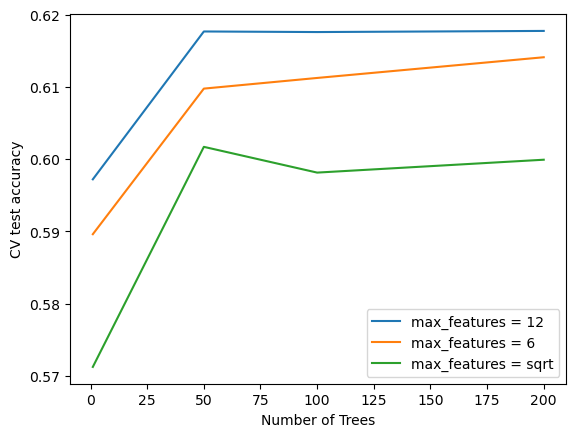

In [134]:
# high correlated 0.2 / 13

plt.xlabel('Number of Trees')
plt.ylabel('CV test accuracy')
for i, max_feat in enumerate(max_features):
    plt.plot(num_trees, test_accs[i*len(num_trees):(i*len(num_trees))+len(num_trees)], label="max_features = "+str(max_feat))
plt.legend(loc="lower right")

plt.show()

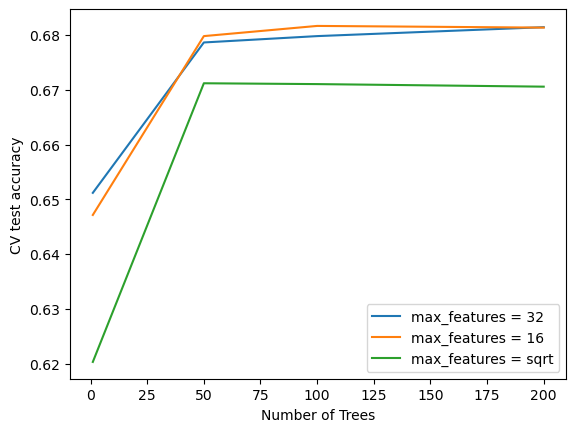

In [161]:
# random pick / 33

plt.xlabel('Number of Trees')
plt.ylabel('CV test accuracy')
for i, max_feat in enumerate(max_features):
    plt.plot(num_trees, test_accs[i*len(num_trees):(i*len(num_trees))+len(num_trees)], label="max_features = "+str(max_feat))
plt.legend(loc="lower right")

plt.show()

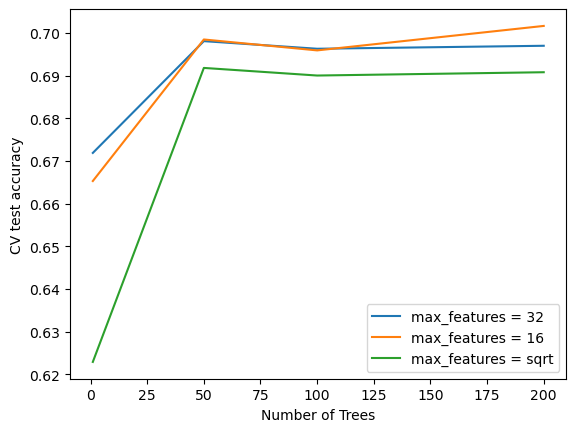

In [177]:
# high correlated 0.1 / 33

plt.xlabel('Number of Trees')
plt.ylabel('CV test accuracy')
for i, max_feat in enumerate(max_features):
    plt.plot(num_trees, test_accs[i*len(num_trees):(i*len(num_trees))+len(num_trees)], label="max_features = "+str(max_feat))
plt.legend(loc="lower right")

plt.show()

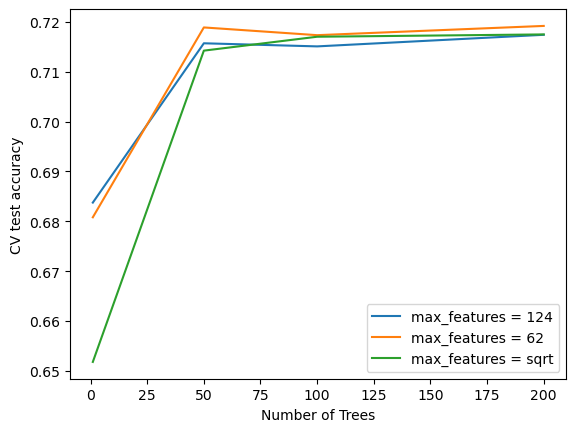

In [131]:
# all 0/125

plt.xlabel('Number of Trees')
plt.ylabel('CV test accuracy')
for i, max_feat in enumerate(max_features):
    plt.plot(num_trees, test_accs[i*len(num_trees):(i*len(num_trees))+len(num_trees)], label="max_features = "+str(max_feat))
plt.legend(loc="lower right")

plt.show()

In [217]:
# correlated_x = merge_cor[outcome_corr>0.25]
# correlated_x
[outcome_corr >=0.25]
[outcome_corr <=-0.25]
# print(len(merge_cor.columns))

[Data_Value                            False
 HPSA Score                            False
 HPSA FTE                              False
 HPSA Designation Population           False
 % of Population Below 100% Poverty    False
                                       ...  
 F_TOTAL                               False
 E_UNINSUR                             False
 M_UNINSUR                             False
 EP_UNINSUR                            False
 MP_UNINSUR                             True
 Name: E_DAYPOP, Length: 124, dtype: bool]

In [13]:
list(SVI.columns)

['ST',
 'STATE',
 'ST_ABBR',
 'COUNTY',
 'FIPS',
 'LOCATION',
 'AREA_SQMI',
 'E_TOTPOP',
 'M_TOTPOP',
 'E_HU',
 'M_HU',
 'E_HH',
 'M_HH',
 'E_POV',
 'M_POV',
 'E_UNEMP',
 'M_UNEMP',
 'E_PCI',
 'M_PCI',
 'E_NOHSDP',
 'M_NOHSDP',
 'E_AGE65',
 'M_AGE65',
 'E_AGE17',
 'M_AGE17',
 'E_DISABL',
 'M_DISABL',
 'E_SNGPNT',
 'M_SNGPNT',
 'E_MINRTY',
 'M_MINRTY',
 'E_LIMENG',
 'M_LIMENG',
 'E_MUNIT',
 'M_MUNIT',
 'E_MOBILE',
 'M_MOBILE',
 'E_CROWD',
 'M_CROWD',
 'E_NOVEH',
 'M_NOVEH',
 'E_GROUPQ',
 'M_GROUPQ',
 'EP_POV',
 'MP_POV',
 'EP_UNEMP',
 'MP_UNEMP',
 'EP_PCI',
 'MP_PCI',
 'EP_NOHSDP',
 'MP_NOHSDP',
 'EP_AGE65',
 'MP_AGE65',
 'EP_AGE17',
 'MP_AGE17',
 'EP_DISABL',
 'MP_DISABL',
 'EP_SNGPNT',
 'MP_SNGPNT',
 'EP_MINRTY',
 'MP_MINRTY',
 'EP_LIMENG',
 'MP_LIMENG',
 'EP_MUNIT',
 'MP_MUNIT',
 'EP_MOBILE',
 'MP_MOBILE',
 'EP_CROWD',
 'MP_CROWD',
 'EP_NOVEH',
 'MP_NOVEH',
 'EP_GROUPQ',
 'MP_GROUPQ',
 'EPL_POV',
 'EPL_UNEMP',
 'EPL_PCI',
 'EPL_NOHSDP',
 'SPL_THEME1',
 'RPL_THEME1',
 'EPL_AGE65',
 'E

In [27]:
list(cities.columns)

['Year',
 'StateAbbr',
 'StateDesc',
 'CityName',
 'GeographicLevel',
 'DataSource',
 'Category',
 'UniqueID',
 'Measure',
 'Data_Value_Unit',
 'DataValueTypeID',
 'Data_Value_Type',
 'Data_Value',
 'Low_Confidence_Limit',
 'High_Confidence_Limit',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'PopulationCount',
 'GeoLocation',
 'CategoryID',
 'MeasureId',
 'CityFIPS',
 'TractFIPS',
 'Short_Question_Text']

In [321]:
hpsa_pc_full[['CityFIPS',  'TractFIPS', 'GeographicLevel']]

,CityFIPS,TractFIPS,GeographicLevel
0,632548.0,6.037603e+09,Census Tract
1,632548.0,NaN,City
2,633000.0,NaN,City
3,633000.0,NaN,City
4,633182.0,NaN,City
...,...,...,...
810098,5548000.0,5.502500e+10,Census Tract
810099,5370000.0,5.305306e+10,Census Tract
810100,5374060.0,5.301104e+10,Census Tract
810101,5502375.0,5.508701e+10,Census Tract


In [75]:
list(hpsa_pc_full.columns)

['HPSA Name',
 'HPSA ID',
 'Designation Type',
 'HPSA Discipline Class',
 'HPSA Score',
 'PC MCTA Score',
 'Primary State Abbreviation',
 'HPSA Status',
 'HPSA Designation Date',
 'HPSA Designation Last Update Date',
 'Metropolitan Indicator',
 'HPSA Geography Identification Number',
 'HPSA Degree of Shortage',
 'Withdrawn Date',
 'HPSA FTE',
 'HPSA Designation Population',
 '% of Population Below 100% Poverty',
 'HPSA Formal Ratio',
 'HPSA Population Type',
 'Rural Status',
 'Longitude',
 'Latitude',
 'BHCMIS Organization Identification Number',
 'Break in Designation',
 'Common County Name',
 'Common Postal Code',
 'Common Region Name',
 'Common State Abbreviation',
 'Common State County FIPS Code',
 'Common State FIPS Code',
 'Common State Name',
 'County Equivalent Name',
 'County or County Equivalent Federal Information Processing Standard Code',
 'Discipline Class Number',
 'HPSA Address',
 'HPSA City',
 'HPSA Component Name',
 'HPSA Component Source Identification Number',
 'HPS

In [280]:
list(Health_Outcomes['Measure'].unique())

['Arthritis among adults aged >=18 Years',
 'Diagnosed diabetes among adults aged >=18 Years',
 'Stroke among adults aged >=18 Years',
 'High blood pressure among adults aged >=18 Years',
 'All teeth lost among adults aged >=65 Years',
 'Coronary heart disease among adults aged >=18 Years',
 'Current asthma among adults aged >=18 Years',
 'Chronic kidney disease among adults aged >=18 Years',
 'Chronic obstructive pulmonary disease among adults aged >=18 Years',
 'Mental health not good for >=14 days among adults aged >=18 Years',
 'Physical health not good for >=14 days among adults aged >=18 Years',
 'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years',
 'Cancer (excluding skin cancer) among adults aged >=18 Years']